## Dataset: Diabetes
## Agenda:
### Applying the Logistic Regression on Diabetes Dataset 

In [1]:
# Import the Library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the Dataset
data=pd.read_csv("C:/Users/Lenovo/Desktop/Semester- III/ML Data Set/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Describe the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Shape of the data
data.shape

(768, 9)

In [5]:
# Missing Value
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

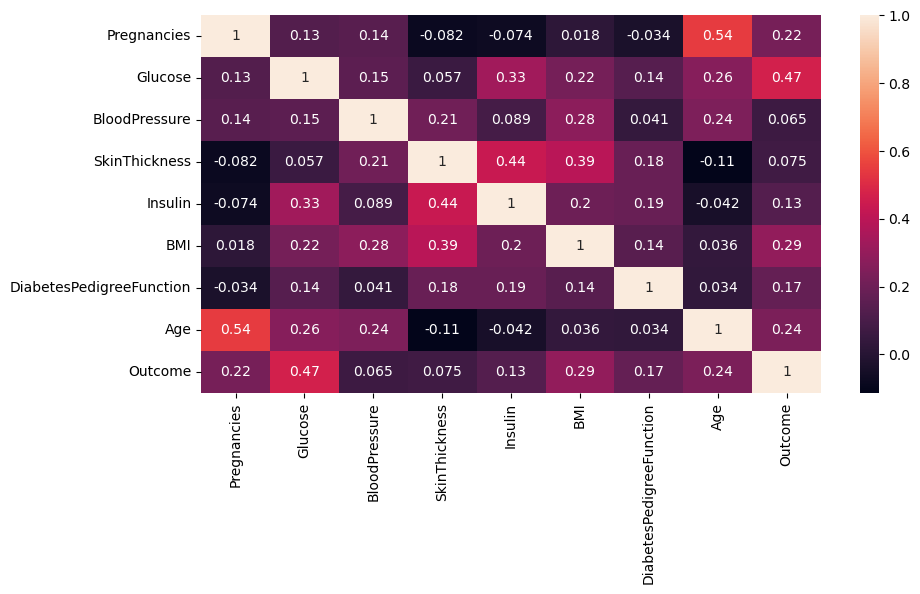

In [6]:
# Make the Heatmap
import seaborn as sns
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(data.corr(),annot=True)
plt.show()

In [7]:
x=data.iloc[:,[0,1,4,5,6,7]].values # Independent variable
y=data.iloc[:,-1].values    # Dependent variable

In [8]:
# Split the dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
# Standard the data and Fit_Transform
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)

In [10]:
# Apply the Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=1)
classifier.fit(xtrain,ytrain) 

LogisticRegression(random_state=1)

In [11]:
# Here, Predict the dataset
y_pred=classifier.predict(xtest)

In [12]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[131  15]
 [ 37  48]]


In [13]:
# Find the Accuracy Scoreof the dataset
import sklearn.metrics as metrics
print("Accuracy",metrics.accuracy_score(ytest,y_pred)*100)
print("Precision",metrics.precision_score(ytest,y_pred)*100)
print("Recall",metrics.recall_score(ytest,y_pred)*100)

Accuracy 77.48917748917748
Precision 76.19047619047619
Recall 56.470588235294116


In [14]:
# Make the Classification Report
from sklearn.metrics import classification_report
print(print(classification_report(ytest,y_pred)))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.56      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

None


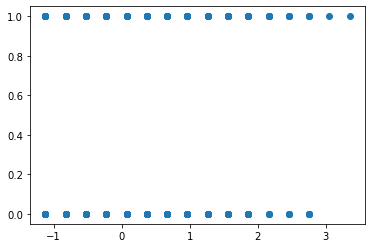

In [15]:
# Make the Scatter plot 
plt.scatter(xtrain[:,0],ytrain)